In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math 


In [17]:
path = 'C:/Users/Drosxo/pima-indians-diabetes.data.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
'class']


In [18]:
data = pd.read_csv (path,names = headernames)

In [19]:
print(data[:3])

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1


In [21]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
count_class = data.groupby('class').size()
print(count_class)

class
0    500
1    268
dtype: int64


In [23]:
#observations with 1 are almost double from those with 0

In [27]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 2)

correlations = data.corr(method='pearson')
print(correlations)
#shows correlation between features

       preg  plas  pres  skin  test  mass  pedi   age  class
preg   1.00  0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54   0.22
plas   0.13  1.00  0.15  0.06  0.33  0.22  0.14  0.26   0.47
pres   0.14  0.15  1.00  0.21  0.09  0.28  0.04  0.24   0.07
skin  -0.08  0.06  0.21  1.00  0.44  0.39  0.18 -0.11   0.07
test  -0.07  0.33  0.09  0.44  1.00  0.20  0.19 -0.04   0.13
mass   0.02  0.22  0.28  0.39  0.20  1.00  0.14  0.04   0.29
pedi  -0.03  0.14  0.04  0.18  0.19  0.14  1.00  0.03   0.17
age    0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.00   0.24
class  0.22  0.47  0.07  0.07  0.13  0.29  0.17  0.24   1.00


In [28]:
print(data.skew())

preg     0.90
plas     0.17
pres    -1.84
skin     0.11
test     2.27
mass    -0.43
pedi     1.92
age      1.13
class    0.64
dtype: float64


## VISUALIZATION

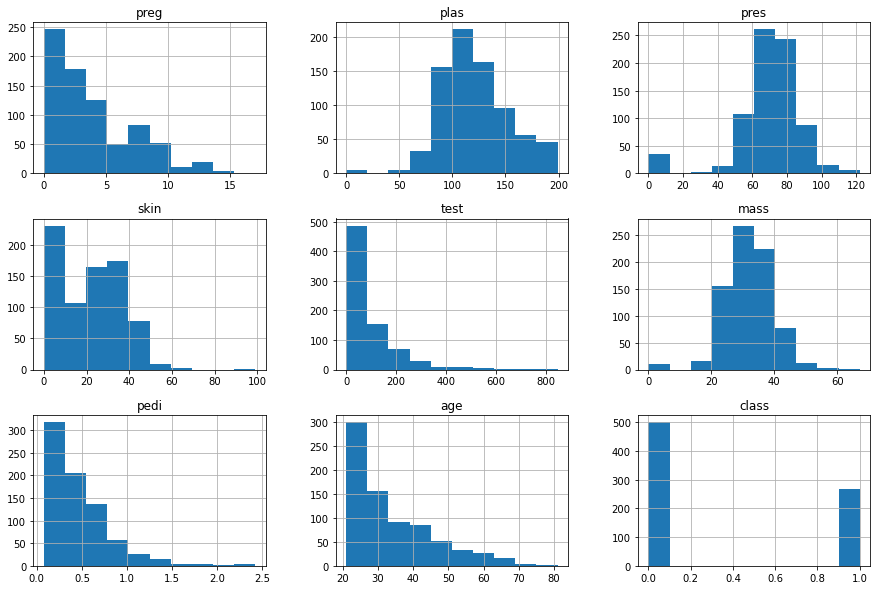

In [32]:
data.hist(figsize=(15,10))
plt.show()

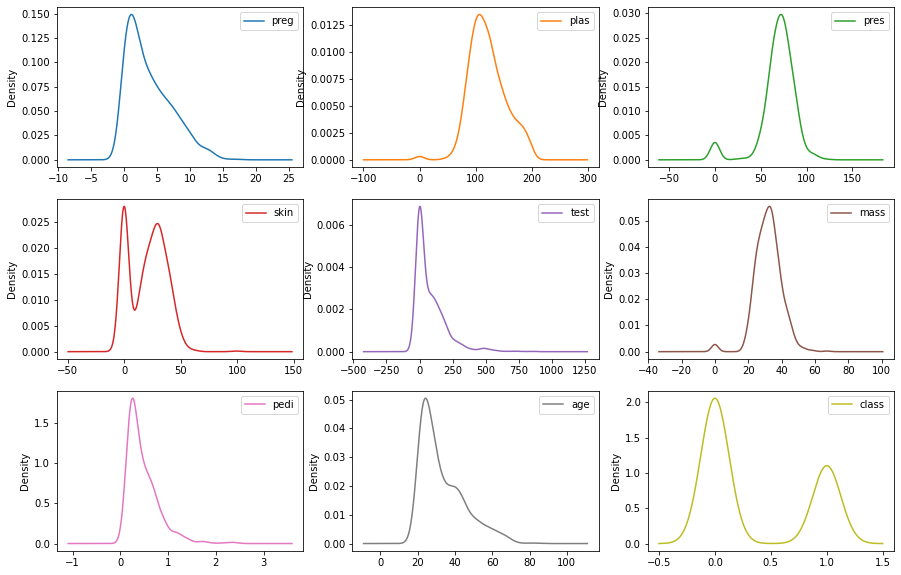

In [35]:
data.plot(figsize=(15,10),kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()


## boxplots 

In [36]:
#It is univariate in nature and summarizes the distribution of each attribute.
#It draws a line for the middle value i.e. for median.
#It draws a box around the 25% and 75%.
#It also draws whiskers which will give us an idea about the spread of the data.
#The dots outside the whiskers signifies the outlier values. Outlier values would be
#1.5 times greater than the size of the spread of the middle data.

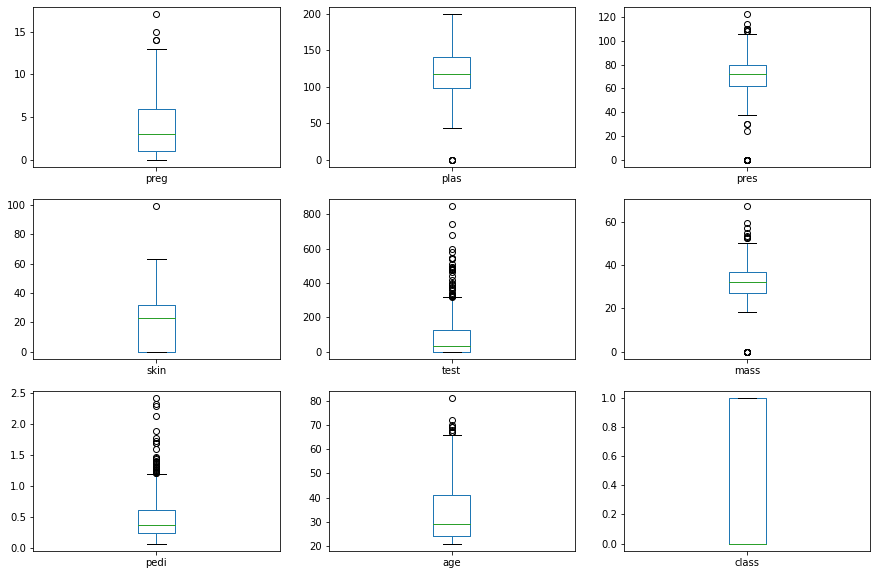

In [38]:
data.plot(figsize=(15,10),kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False)
plt.show()


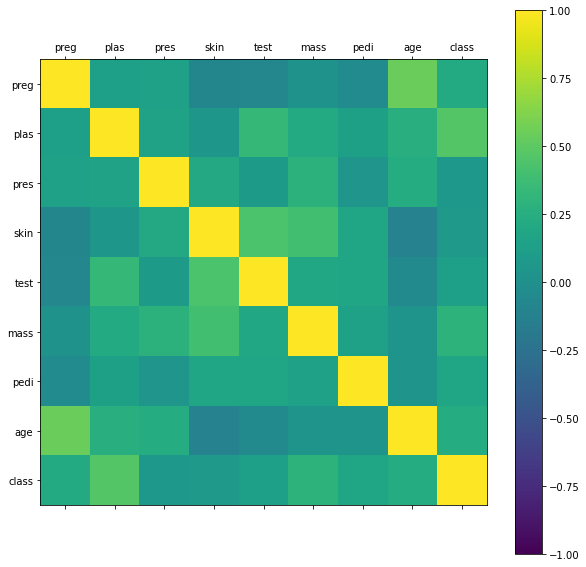

In [45]:
correlations = data.corr()
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(headernames)
ax.set_yticklabels(headernames)
plt.show()

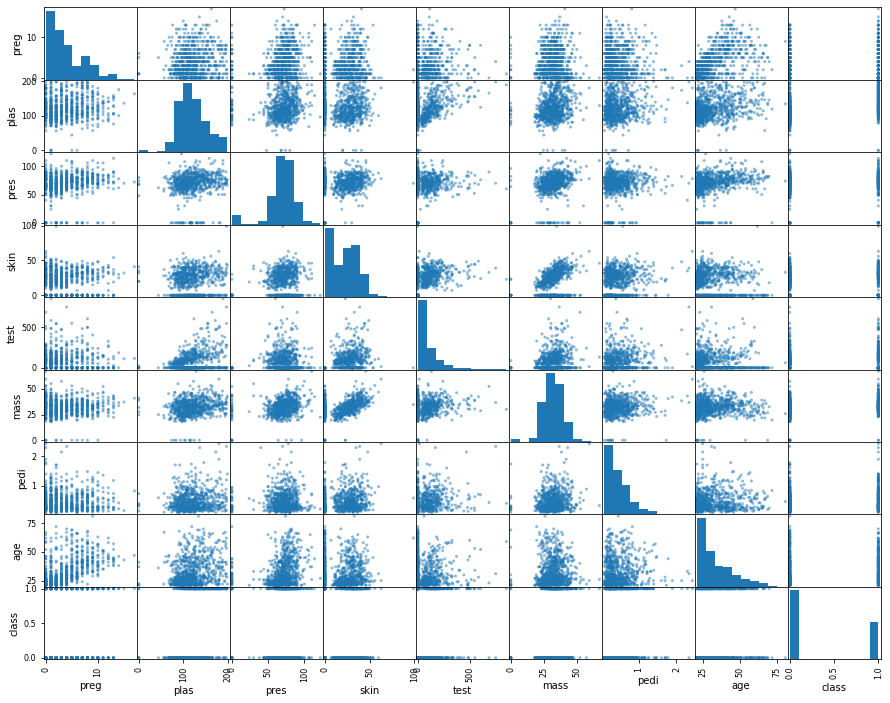

In [54]:
pd.plotting.scatter_matrix(data,figsize=(15,12))
plt.show()

## Data Preprocessing Techniques

### Scaling 

In [56]:
from numpy import set_printoptions
from sklearn import preprocessing
array = data.values

In [58]:
#We scale our data in range[0,1]
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescaled = data_scaler.fit_transform(array)


In [59]:
set_printoptions(precision=1)
print ("\nScaled data:\n", data_rescaled[0:10])


Scaled data:
 [[0.4 0.7 0.6 0.4 0.  0.5 0.2 0.5 1. ]
 [0.1 0.4 0.5 0.3 0.  0.4 0.1 0.2 0. ]
 [0.5 0.9 0.5 0.  0.  0.3 0.3 0.2 1. ]
 [0.1 0.4 0.5 0.2 0.1 0.4 0.  0.  0. ]
 [0.  0.7 0.3 0.4 0.2 0.6 0.9 0.2 1. ]
 [0.3 0.6 0.6 0.  0.  0.4 0.1 0.2 0. ]
 [0.2 0.4 0.4 0.3 0.1 0.5 0.1 0.1 1. ]
 [0.6 0.6 0.  0.  0.  0.5 0.  0.1 0. ]
 [0.1 1.  0.6 0.5 0.6 0.5 0.  0.5 1. ]
 [0.5 0.6 0.8 0.  0.  0.  0.1 0.6 1. ]]


## L1 Normalization


In [60]:
#the normalization technique that modifies the dataset values in a
#way that in each row , the sum of the absolute values will always be up to 1

In [62]:
from sklearn.preprocessing import Normalizer

Data_normalizer = Normalizer(norm='l1').fit(array)
Data_normalized = Data_normalizer.transform(array)



In [76]:
set_printoptions(precision=3)
print ("\nNormalized data:\n", Data_normalized [0:3])


Normalized data:
 [[0.017 0.427 0.208 0.101 0.    0.097 0.002 0.144 0.003]
 [0.004 0.356 0.276 0.121 0.    0.111 0.001 0.13  0.   ]
 [0.026 0.587 0.205 0.    0.    0.075 0.002 0.103 0.003]]


## L2 Normalization

In [ ]:
#the normalization technique that modifies the dataset values in a
#way that in each row the sum of the squares will always be up to 1
